In [ ]:
!pip install torchinfo

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

from torchsummary import summary
from model import LSTM_with_EFFICIENTNET

In [33]:
model=models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()
input=torch.randn(150,3,224,224).to(device)

with torch.no_grad():
    output=model(input)
    print(output.shape)


torch.Size([150, 1000])


In [ ]:
model = LSTM_with_EFFICIENTNET(num_classes=51, hidden_size=128, num_layers=2,pretrained=True,fine_tune=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

summary(model,input_size=(24,3, 10, 224, 224))

In [25]:
model=models.efficientnet_b7(weights=models.EfficientNet_B7_Weights.DEFAULT)

model.to(device)

# summary with batch size 128
summary(model, input_size=(24,3, 224, 224))


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 24, 3, 224, 224]

In [ ]:
list(model.children())[:-1]

summary(model, (3, 224, 224))

In [ ]:
resnet = models.resnet18()
resnet.to(device)
# list(resnet.children())[:-2]
summary(resnet, (3, 224, 224))

In [1]:
import pickle

# file_name='history/vit_128_2_24_15_Thu Apr 27 123401 2023/history.pickle'
file_name='history/Sat Apr 29 212005 2023/history.pickle'
# with open('history/b0_128_2_24_15_Sat Apr 22 120648 2023/history.pickle', 'rb') as f:
# with open('history/b0_256_2_24_15_Wed Apr 26 084548 2023/history.pickle', 'rb') as f:
with open(file_name, 'rb') as f:
    history = pickle.load(f)

history


{'train_loss': [0.08404688396327892,
  0.07717326102731861,
  0.07586078480531853,
  0.07516174619472615,
  0.07481751501517452,
  0.07454289368483046,
  0.0744027240007604,
  0.07426104070783421,
  0.07415375606985632,
  0.07406554792522654,
  0.07399773827111031,
  0.07396567598643643,
  0.07394092281282152,
  0.07384144873509815,
  0.0738261578221077,
  0.07379187455573515,
  0.07374382048974829,
  0.0737176917874723,
  0.07369705568578529,
  0.07368978006822548,
  0.07364389632489403,
  0.07365490906338262,
  0.07362805578373312,
  0.07362980947502756,
  0.07360914011124735,
  0.07361830185474552,
  0.0735948634129031,
  0.07359176553210744,
  0.07358925425287449,
  0.07357748579404452,
  0.07356581796788664,
  0.0735669316531445,
  0.07353327622009982,
  0.07353689750850555,
  0.0735365674644803],
 'train_acc': [74.47250706840528,
  90.48824745748406,
  93.56986116386041,
  95.18609950626661,
  96.02481326750221,
  96.65147487023674,
  96.98379541714141,
  97.33194075199393,
  97.

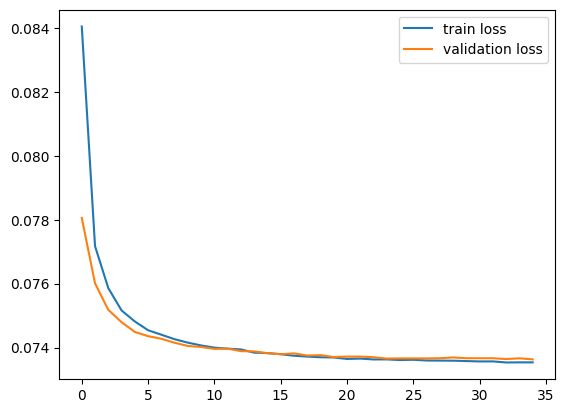

In [2]:
# plot a graph of the training loss and validation loss over the training epochs
import matplotlib.pyplot as plt
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.legend()
plt.show()


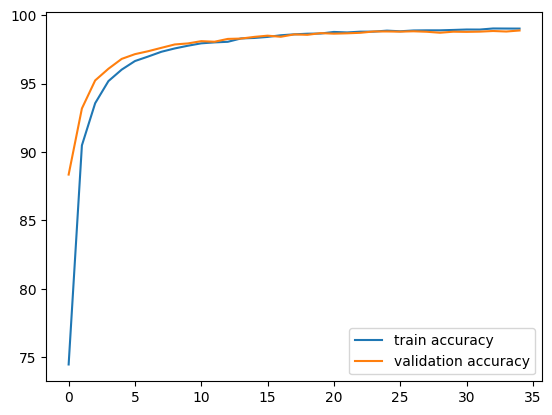

In [3]:
# plot a graph of the training accuracy and validation accuracy over the training epochs
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [4]:
max_accuracy = max(history['val_acc'])
max_accuracy

98.88593492847195